In [17]:
import os, sys, pandas as pd, pickle
sys.path.append("/content")
from src.utils import plot_obs_predict
os.chdir("/content")
with open("/content/credentials") as f:
    env_vars = f.read().split("\n")

for var in env_vars:
    key, value = var.split(" = ")
    os.environ[key] = value

storage_options = {"account_name":os.environ["ACCOUNT_NAME"],
                   "account_key":os.environ["BLOB_KEY"]}


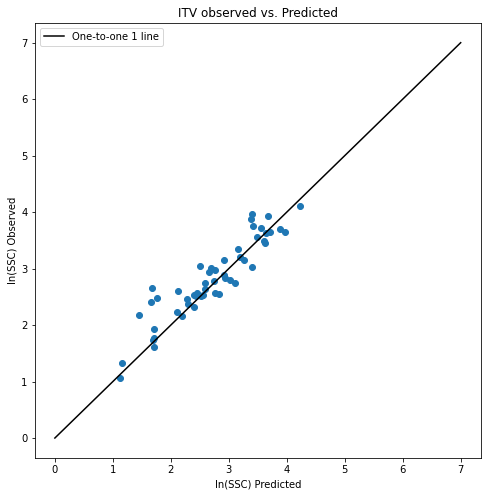

In [21]:
results = pd.read_csv("output/mlp/grid_search_metadata.csv")

with open(results.iloc[results["itv_R2"].argmax(), :]["path"], "rb") as f:
    top_model = pickle.load(f)

list(top_model.keys())
plot_obs_predict(top_model["itv_obs_predict"], "ITV observed vs. Predicted")